# The Curse of Dimensionality
During the first lecture, we saw the limitations of the kNN algorithm when it is used in very high dimensions: the concept of neighborhood becomes relative as points in a high dimensional space are sparse.

Let's see what happens with the distance to a hyperplane.

In [5]:
# Enable interactive plot
%matplotlib widget

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [7]:
np.random.seed(19680801)
def generate_points(steps):
    x = np.random.random(50)
    y = np.random.random(50)/10
    z= np.random.random(50)
    y_step = np.random.random(50)/10
    data = []
    points = np.concatenate(([x],[0.0*y],[z]),axis=0).T
    data.append(points) 
    for i in range(0,steps):
        points = np.concatenate(([x],[y+i*y_step],[z]),axis=0).T
        data.append(points) 
    
    return data

def update_plot(iteration, data, scatter, a_plot):
    #for i in range(data[0].shape[0]):
    scatter.set_data(data[iteration][:,0],data[iteration][:,1])
    scatter.set_3d_properties(data[iteration][:,2])
    xx, zz = np.meshgrid(np.arange(0,1.1,0.05), np.arange(0,iteration*0.1,0.05))
    yy = 0.5*np.ones(zz.shape)
    a_plot[0].remove()
    a_plot[0] = ax.plot_surface(xx, zz, yy, color='b', alpha=0.2)
    return scatter

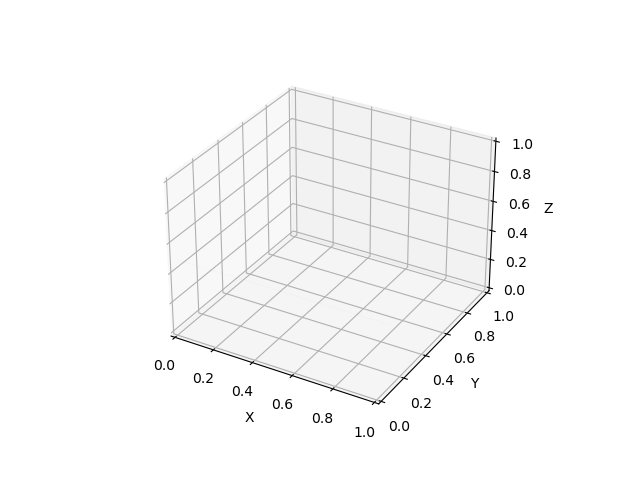

In [8]:
# Attaching 3D axis to the figure
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

steps=11
points = generate_points(steps)

xx, zz = np.meshgrid(np.arange(0,1.1,0.05), np.arange(0,0.001,0.0005))
yy = 0.5*np.ones(zz.shape)

scatter, = ax.plot([],[],[], "o", markersize=2, c='g')
a_plot = [ax.plot_surface(xx, zz, yy, color='b', alpha=0.2)]

# Setting the axes properties
ax.set(xlim3d=(0, 1), xlabel='X')
ax.set(ylim3d=(0, 1), ylabel='Y')
ax.set(zlim3d=(0, 1), zlabel='Z')

ani = animation.FuncAnimation(
    fig, update_plot, steps, fargs=(points, scatter, a_plot), interval=1000, blit=False, repeat=False)
plt.show()

**Observation:** We observe at first a set of points in the XZ plane (2D) to which then a third coordinate (in Y) is added as a random value. While distance between points can increase, the distance of each point to the hyperplane Z=0.5, no matter the value of the new y-coordinate, remains constant. 

**Note:** To run this notebook, you may need to install an extra library in your malis environment. Run the following command

```bash
conda install conda-forge ipympl
```